In [1]:
#-*-coding:utf-8-*-

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
yearly_area_prod_df = pd.read_excel('2013_2023_onion_area_product.xlsx')

# yearly_area_prod_df에 year, month 컬럼 추가
yearly_area_prod_df = yearly_area_prod_df.rename(columns={'datetime': 'date_time'})

# year, month 컬럼 추가
yearly_area_prod_df['year'] = pd.DatetimeIndex(yearly_area_prod_df['date_time']).year
yearly_area_prod_df['month'] = pd.DatetimeIndex(yearly_area_prod_df['date_time']).month

yearly_area_prod_df = pd.read_excel('2013_2023_onion_area_product.xlsx')

# yearly_area_prod_df에 year, month 컬럼 추가
yearly_area_prod_df = yearly_area_prod_df.rename(columns={'datetime': 'date_time'})

# year, month 컬럼 추가
yearly_area_prod_df['year'] = pd.DatetimeIndex(yearly_area_prod_df['date_time']).year


# 생산량(톤) -> 연단위생산량
yearly_area_prod_df = yearly_area_prod_df.rename(columns={'생산량(톤)': '연단위생산량(톤)'})

yearly_area_prod_df

,date_time,재배면적합계(ha),10a당생산량(kg),연단위생산량(톤),year
0,2013-01-01,20036.0000,6458.0,1294009.0,2013
1,2014-01-01,23911.0000,6649.0,1589957.0,2014
2,2015-01-01,18015.0000,6072.0,1093932.0,2015
3,2016-01-01,19896.0000,6528.0,1298749.0,2016
4,2017-01-01,19538.4565,5858.0,1144493.0,2017
5,2018-01-01,26425.4270,5756.0,1520969.0,2018
6,2019-01-01,21777.3413,7322.0,1594450.0,2019
7,2020-01-01,14673.2764,7962.0,1168227.0,2020
8,2021-01-01,18461.4043,8541.0,1576752.0,2021
9,2022-01-01,17660.8098,6770.0,1195563.0,2022


In [4]:
# 날짜 범위가 '2013-01-01'에서 '2022-11-01'인 새 데이터 프레임 생성
new_date_range = pd.date_range(start='2013-01-01', end='2022-11-01', name='date_time')
new_withnull_df = pd.DataFrame({'date_time': new_date_range})

# year, month 컬럼 추가
new_withnull_df['year'] = pd.DatetimeIndex(new_withnull_df['date_time']).year

#'year'컬럼 기준으로 두 데이터프레임 합침
area_prod_df = pd.merge(new_withnull_df, yearly_area_prod_df, on='year')

# 겹치는 date_time 제거
area_prod_df = area_prod_df.rename(columns={'date_time_x': 'date_time'})
area_prod_df = area_prod_df.drop('date_time_y', axis=1)

# 결과 출력
area_prod_df

,date_time,year,재배면적합계(ha),10a당생산량(kg),연단위생산량(톤)
0,2013-01-01,2013,20036.0000,6458.0,1294009.0
1,2013-01-02,2013,20036.0000,6458.0,1294009.0
2,2013-01-03,2013,20036.0000,6458.0,1294009.0
3,2013-01-04,2013,20036.0000,6458.0,1294009.0
4,2013-01-05,2013,20036.0000,6458.0,1294009.0
...,...,...,...,...,...
3587,2022-10-28,2022,17660.8098,6770.0,1195563.0
3588,2022-10-29,2022,17660.8098,6770.0,1195563.0
3589,2022-10-30,2022,17660.8098,6770.0,1195563.0
3590,2022-10-31,2022,17660.8098,6770.0,1195563.0


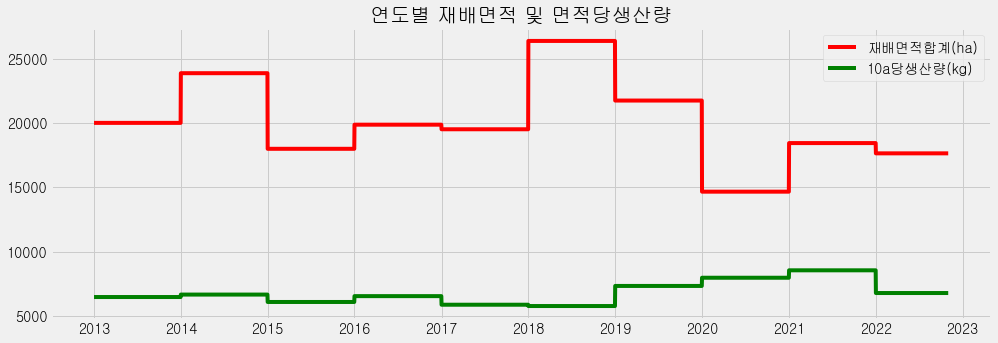

In [5]:
#### 연도별 재배면적 & 면적당 재배량 및 월별 재배량

# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15,5))

# plot 표시
ax.plot(area_prod_df['date_time'], area_prod_df['재배면적합계(ha)'], 'r')
ax.plot(area_prod_df['date_time'], area_prod_df['10a당생산량(kg)'], 'g')


# 플롯 제목 및 범례 설정
ax.set_title('연도별 재배면적 및 면적당생산량')
ax.legend(['재배면적합계(ha)', '10a당생산량(kg)'])

# 플롯 표시
plt.show()

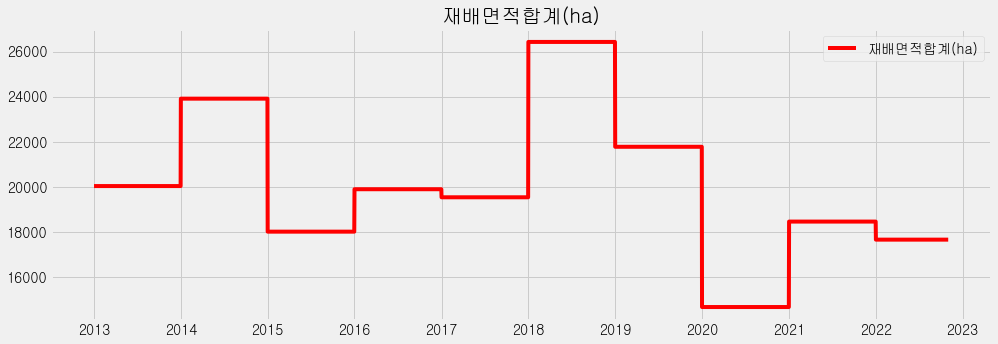

In [6]:
#### 연도별 재배면적 & 면적당 재배량 및 월별 재배량

# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15,5))

# plot 표시
ax.plot(area_prod_df['date_time'], area_prod_df['재배면적합계(ha)'], 'r')


# 플롯 제목 및 범례 설정
ax.set_title('재배면적합계(ha)')
ax.legend(['재배면적합계(ha)'])

# 플롯 표시
plt.show()

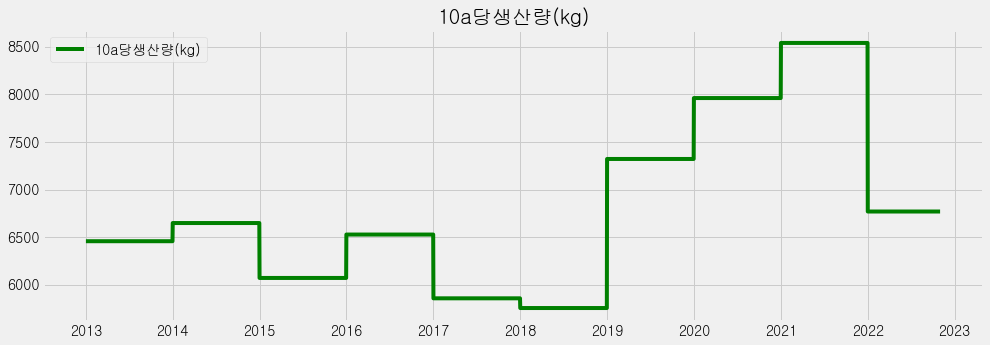

In [7]:
#### 연도별 재배면적 & 면적당 재배량 및 월별 재배량

# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15,5))

# plot 표시
ax.plot(area_prod_df['date_time'], area_prod_df['10a당생산량(kg)'], 'g')


# 플롯 제목 및 범례 설정
ax.set_title('10a당생산량(kg)')
ax.legend(['10a당생산량(kg)'])

# 플롯 표시
plt.show()

In [8]:
# date_time을 인덱스로 설정
area_prod_df = area_prod_df.set_index('date_time')
area_prod_df.index = pd.to_datetime(area_prod_df.index)
area_prod_df

,year,재배면적합계(ha),10a당생산량(kg),연단위생산량(톤)
date_time,,,,
2013-01-01,2013,20036.0000,6458.0,1294009.0
2013-01-02,2013,20036.0000,6458.0,1294009.0
2013-01-03,2013,20036.0000,6458.0,1294009.0
2013-01-04,2013,20036.0000,6458.0,1294009.0
2013-01-05,2013,20036.0000,6458.0,1294009.0
...,...,...,...,...
2022-10-28,2022,17660.8098,6770.0,1195563.0
2022-10-29,2022,17660.8098,6770.0,1195563.0
2022-10-30,2022,17660.8098,6770.0,1195563.0


In [9]:
area_prod_df.to_excel(excel_writer='new_quantity_area_2013_22.xlsx', sheet_name='2013이후재배면적생산량데이터')